<a href="https://colab.research.google.com/github/Axl11475581/FreeCodeCamp-Tensor-Flow-Repo/blob/main/Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gym   # all you have to do to import and use open ai gym!

In [ ]:
env = gym.make('FrozenLake-v0')  # we are going to use the FrozenLake enviornment

In [ ]:
print(env.observation_space.n)   # get number of states
print(env.action_space.n)   # get number of actions

16
4


In [ ]:
env.reset()  # reset enviornment to default state

0

In [ ]:
action = env.action_space.sample()  # get a random action 

In [ ]:
new_state, reward, done, info = env.step(action)  # take action, notice it returns information about the action

In [ ]:
env.render()   # render the GUI for the enviornment 

  (Right)
SFFF
FHFH
FFFH
HFFG


* Frozen Lake test


In [ ]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [ ]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values 
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

In [ ]:
epsilon = 0.9  # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

In [ ]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9


In [ ]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[1.78661430e-02 1.75227031e-02 8.47083394e-02 1.83499568e-02]
 [9.87453518e-04 4.91324746e-03 3.41176956e-03 3.24817945e-02]
 [5.60806215e-03 7.58375590e-03 4.27636990e-03 2.16552662e-02]
 [1.38329251e-03 5.54357711e-03 4.06688772e-03 1.87267470e-02]
 [2.52204537e-01 8.68361977e-03 2.78190058e-04 5.58191143e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.85113439e-05 3.45436206e-05 9.24271640e-05 1.77150852e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.75765835e-03 1.55919287e-02 4.56269091e-03 4.34638635e-01]
 [7.26813097e-03 2.57596778e-01 3.30456905e-03 1.05265431e-02]
 [4.05543665e-02 3.31955483e-03 8.81280148e-04 1.11525535e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.76834595e-02 5.52971049e-03 8.70144966e-01 3.24840259e-02]
 [1.41089629e-01 9.99082481e-01 2.22730208e-01 1.94071326e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

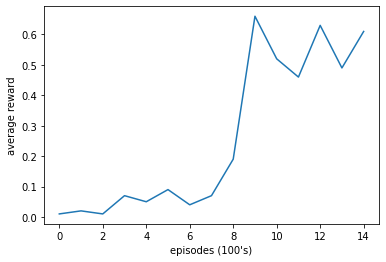

In [ ]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()